# Astrobiology - ASP5002
## Homework 1


### Preprocessing


In [1]:
# importing important stuff...
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, NullFormatter
import matplotlib.colors as colors
import pandas as pd
import numpy as np


# Defaults
plt.style.use('dark_background')

### 1st Plot: H-R diagram

632


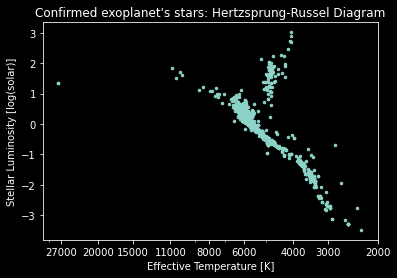

In [3]:
# Getting Data
data01 = pd.read_csv('./data01.csv', comment='#')
data01.dropna(inplace=True)
print(len(data01))

# Adding data to plot
plt.scatter(
    x=data01["st_teff"],
    y=data01["st_lum"],
    s=np.pi*2,
)

# Formatting...
plt.xscale('log')
plt.xlabel('Effective Temperature [K]'),
plt.ylabel('Stellar Luminosity [log(solar)]')
plt.title('Confirmed exoplanet\'s stars: Hertzsprung-Russel Diagram')
plt.gca().invert_xaxis()
plt.xticks([2000,3000,4000,6000,8000,11000,15000,20000,27000])
plt.gca().xaxis.set_minor_formatter(NullFormatter())
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.savefig('plot01.png', dpi=300)


### 2nd Plot: H-R diagram and Semi-Major Axis

Radial Velocity                  291
Transit                          289
Imaging                           19
Orbital Brightness Modulation      2
Transit Timing Variations          1
Disk Kinematics                    1
Name: pl_discmethod, dtype: int64
603


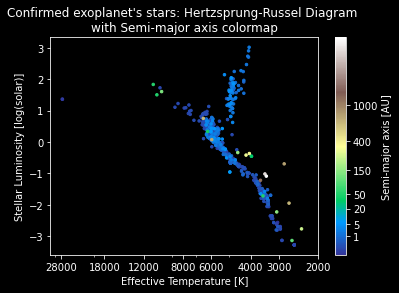

In [5]:
# Getting Data
data02 = pd.read_csv('./data02.csv', comment='#')
data02.dropna(inplace=True)
data02.reset_index(drop=True, inplace=True)
data02.sort_values(by="pl_orbsmax", inplace=True)
print(data02["pl_discmethod"].value_counts())
print(len(data02))

# Adding data to plot
plt.scatter(
    x=data02["st_teff"],
    y=data02["st_lum"],
    s=np.pi*2,
    c=data02["pl_orbsmax"],
    cmap='terrain',
    norm=colors.PowerNorm(gamma=0.3)
)

# Formatting...
plt.colorbar(ticks=[0,1,5,20,50,150,400,1000], label="Semi-major axis [AU]")
plt.xscale('log')
plt.xlabel('Effective Temperature [K]'),
plt.ylabel('Stellar Luminosity [log(solar)]')
plt.title('Confirmed exoplanet\'s stars: Hertzsprung-Russel Diagram \nwith Semi-major axis colormap')
plt.gca().invert_xaxis()
plt.xticks([2000,3000,4000,6000,8000,12000,18000,28000])
plt.gca().xaxis.set_minor_formatter(NullFormatter())
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.style.use('dark_background')
plt.savefig('plot02.png', dpi=300)

### 3rd Plot: H-R diagram and habitable zone

False    250
True      19
Name: habitable, dtype: int64


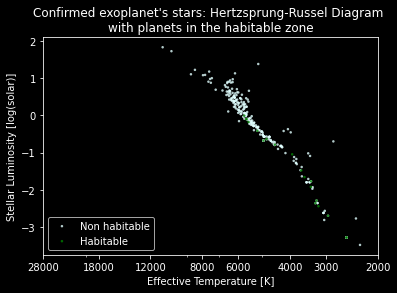

In [9]:
# Getting Data
# pl_name,st_teff,pl_eqt,st_lum
data03 = pd.read_csv('./data03.csv', comment='#') 
data03.dropna(inplace=True)
data03.reset_index(drop=True, inplace=True)
data03["habitable"] = data03.apply(lambda x: 270 <= x["pl_eqt"] <= 380, axis=1)
print(data03["habitable"].value_counts())

fig, ax = plt.subplots()
for color in ['lightcyan', 'green']:
    if color == 'green':
        data = data03.where(data03["habitable"])
        label = 'Habitable'
    else:
        data = data03.where(data03["habitable"] == False)
        label = 'Non habitable'
    data.dropna(inplace=True)
    x=data["st_teff"]
    y=data["st_lum"]
    ax.scatter(x, y, c=color, s=np.pi*2, label=label,
               alpha=0.8, edgecolors='none')

plt.xscale('log')
plt.xlabel('Effective Temperature [K]'),
plt.ylabel('Stellar Luminosity [log(solar)]')
plt.title('Confirmed exoplanet\'s stars: Hertzsprung-Russel Diagram \nwith planets in the habitable zone')
plt.gca().invert_xaxis()
plt.xticks([2000,3000,4000,6000,8000,12000,18000,28000])
plt.gca().xaxis.set_minor_formatter(NullFormatter())
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.legend(loc='lower left')

plt.style.use('dark_background')
plt.savefig('plot03.png', dpi=300)

In [11]:
data03_2 = pd.read_csv('./data03.csv', comment='#')
data03_2.drop(columns=["st_teff", "st_lum"], inplace=True)
data03_2.dropna(inplace=True)
data03_2.reset_index(drop=True, inplace=True)

data03_2["habitable"] = data03_2.apply(lambda x: 270 <= x["pl_eqt"] <= 380, axis=1)
print(data03_2["habitable"].value_counts())
data03_2.sort_values("pl_eqt", inplace=True)

False    668
True      32
Name: habitable, dtype: int64


### 4th Plot: Exoplanet populations

3170
Transit                          3142
Radial Velocity                    13
Transit Timing Variations           7
Imaging                             5
Orbital Brightness Modulation       3
Name: pl_discmethod, dtype: int64


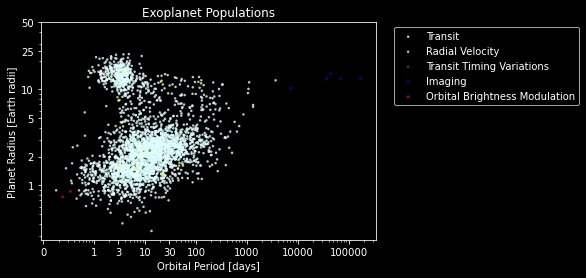

In [22]:
# Getting Data
data05 = pd.read_csv('./data05.csv', comment='#')
data05.dropna(inplace=True)
data05.reset_index(drop=True, inplace=True)
print(len(data05))
print(data05["pl_discmethod"].value_counts())
# Adding data to plot

color_dict = {"Transit":"lightcyan", "Radial Velocity":"yellow", 
              "Transit Timing Variations":"green", "Imaging":"blue", 
              "Orbital Brightness Modulation":"red"}



fig, ax = plt.subplots()
for discovery in list(color_dict.keys()):
    data = data05.where(data05["pl_discmethod"] == discovery)
    y = data["pl_rade"]
    x = data["pl_orbper"]
    ax.scatter(x, y, c=color_dict[discovery], s=np.pi*2, label=discovery,
               alpha=0.8, edgecolors='none')


# Formatting...    

plt.xlabel('Orbital Period [days]')
plt.ylabel('Planet Radius [Earth radii]')
plt.title('Exoplanet Populations')

plt.yscale('log')
plt.yticks([1,2,5,10,25,50])
plt.xscale('log')
plt.xticks([0.1,1,3,10,30,100,1000,10000,100000])
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(NullFormatter())
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.style.use('dark_background')
plt.savefig('plot05.png', dpi=300,bbox_inches="tight")

### ESI: Earth Similarity Index

In [14]:
# Getting Data
# pl_dens, pl_eqt, pl_masse, pl_rade
data04 = pd.read_csv('./data04.csv', comment='#')
data04.dropna(inplace=True)
data04.reset_index(drop=True, inplace=True)

data04["pl_dense"] = data04.apply(lambda x: x["pl_dens"]/5.51, axis=1)

data04["pl_radm"] = data04.apply(lambda x: x["pl_rade"]*6371000, axis=1)
data04["pl_masskg"] = data04.apply(lambda x: x["pl_masse"]*5.972*10**24, axis=1)
data04["pl_esvelms"] = data04.apply(lambda x: np.sqrt((2*(6.67408*10**-11)*x["pl_masskg"])/x["pl_radm"]), axis=1)

data04["pl_esvele"] = data04.apply(lambda x: x["pl_esvelms"]/11186, axis=1)

data04["pl_esi"] = data04.apply(lambda x: 
                                (1-abs((x["pl_rade"]-1)/(x["pl_rade"]+1)))**(0.57/4) * 
                                (1-abs((x["pl_dense"]-1)/(x["pl_dense"]+1)))**(1.07/4) * 
                                (1-abs((x["pl_esvele"]-1)/(x["pl_esvele"]+1)))**(0.7/4) * 
                                (1-abs((x["pl_eqt"]-288)/(x["pl_eqt"]+288)))**(5.58/4)                                
                                ,axis=1)

In [15]:
data04.sort_values(by="pl_esi", inplace=True, ascending=False)
data04.reset_index(drop=True, inplace=True)
data04[["pl_name","pl_esi"]].head(10)

,pl_name,pl_esi
0,TRAPPIST-1 d,0.936460
1,TRAPPIST-1 e,0.856224
2,TRAPPIST-1 c,0.849644
3,K2-18 b,0.823961
4,TRAPPIST-1 f,0.737629
5,TRAPPIST-1 g,0.736465
6,LHS 1140 b,0.734032
7,TRAPPIST-1 b,0.720468
8,Kepler-538 b,0.698631
9,LHS 1140 c,0.684199
